<a href="https://colab.research.google.com/github/swarnava-96/Financial-Analytics-with-Python/blob/main/ETH_Price_Prediction_using_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Future Price of Ethereum**
Data Source: Yahoo Finance (01/01/2021 - 08/09/2021)

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [2]:
cd "/content/drive/MyDrive/Datasets"

/content/drive/MyDrive/Datasets


### Loading the dataset

In [4]:
df = pd.read_csv("ETH-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358
1,2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179
2,2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368
3,2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763
4,2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781


In [5]:
# Lets set the date as index

df = df.set_index(pd.DatetimeIndex(df["Date"].values))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2021-01-01,2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358
2021-01-02,2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179
2021-01-03,2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368
2021-01-04,2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763
2021-01-05,2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781


### Model Building

In [6]:
future_days = 5

In [7]:
# Creating the target column
df[str(future_days) + "_Days_Price_Forecast"] = df[["Close"]].shift(- future_days)

# Lets see the current price and the future price
df[["Close", str(future_days) + "_Days_Price_Forecast"]]

,Close,5_Days_Price_Forecast
2021-01-01,730.367554,1207.112183
2021-01-02,774.534973,1225.678101
2021-01-03,975.507690,1224.197144
2021-01-04,1040.233032,1281.077271
2021-01-05,1100.006104,1262.246704
...,...,...
2021-09-04,3887.828369,NaN
2021-09-05,3952.133545,NaN
2021-09-06,3928.379395,NaN
2021-09-07,3426.394287,NaN


In [8]:
# Independent feature

X = np.array(df[["Close"]])
X = X[: df.shape[0] - future_days] 
print(X)

[[ 730.367554]
 [ 774.534973]
 [ 975.50769 ]
 [1040.233032]
 [1100.006104]
 [1207.112183]
 [1225.678101]
 [1224.197144]
 [1281.077271]
 [1262.246704]
 [1090.145386]
 [1043.43457 ]
 [1130.73938 ]
 [1218.453003]
 [1171.834595]
 [1233.537598]
 [1230.172241]
 [1257.279541]
 [1377.295898]
 [1382.274048]
 [1121.570923]
 [1236.512207]
 [1230.990601]
 [1391.609375]
 [1324.414795]
 [1357.058105]
 [1253.187134]
 [1298.101807]
 [1382.522827]
 [1376.115479]
 [1314.986206]
 [1369.040527]
 [1515.193726]
 [1660.909546]
 [1594.762695]
 [1718.650879]
 [1677.846802]
 [1614.227783]
 [1746.616821]
 [1768.035034]
 [1744.243408]
 [1783.797974]
 [1843.532593]
 [1814.109863]
 [1805.084106]
 [1779.791016]
 [1781.067505]
 [1848.458252]
 [1937.449219]
 [1960.164795]
 [1919.534058]
 [1935.601074]
 [1781.99292 ]
 [1570.203979]
 [1626.575684]
 [1475.703735]
 [1446.033691]
 [1459.973145]
 [1416.04895 ]
 [1564.707642]
 [1492.608765]
 [1575.853149]
 [1541.914307]
 [1533.275024]
 [1654.741577]
 [1723.153809]
 [1834.727

In [9]:
# Independent feature

y = np.array(df[str(future_days) + "_Days_Price_Forecast"])
y = y[: - future_days]
print(y)

[1207.112183 1225.678101 1224.197144 1281.077271 1262.246704 1090.145386
 1043.43457  1130.73938  1218.453003 1171.834595 1233.537598 1230.172241
 1257.279541 1377.295898 1382.274048 1121.570923 1236.512207 1230.990601
 1391.609375 1324.414795 1357.058105 1253.187134 1298.101807 1382.522827
 1376.115479 1314.986206 1369.040527 1515.193726 1660.909546 1594.762695
 1718.650879 1677.846802 1614.227783 1746.616821 1768.035034 1744.243408
 1783.797974 1843.532593 1814.109863 1805.084106 1779.791016 1781.067505
 1848.458252 1937.449219 1960.164795 1919.534058 1935.601074 1781.99292
 1570.203979 1626.575684 1475.703735 1446.033691 1459.973145 1416.04895
 1564.707642 1492.608765 1575.853149 1541.914307 1533.275024 1654.741577
 1723.153809 1834.727905 1868.048828 1799.16626  1826.194946 1772.102417
 1924.685425 1854.564331 1791.702271 1806.971802 1823.449341 1782.855103
 1817.624146 1812.634644 1788.217041 1691.333984 1678.650146 1593.413452
 1595.359253 1702.842041 1716.494629 1691.355957 1819

In [10]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
# Model fitting

svr = SVR(kernel = "rbf", C = 1e3, gamma = 0.00001)
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [12]:
# Lets check the model performance

svr.score(X_test, y_test)

0.8274335147627553

We can't say that it performed bad. The dataset that I have taken is very small and prices really fluctuates each and every time. So, considering these in mind SVR perfomed well enough.

In [13]:
# Lets see the predicted data

svr_predicted = svr.predict(X_test)
svr_predicted

array([2001.26128055, 3232.63988089, 3238.88544379, 1236.89954534,
       1786.62464408, 1778.59605623, 1796.38433864, 1634.46918492,
       1790.70046884, 3217.50597822, 3261.60924071, 1606.49123235,
       1953.59575646, 2356.51512696, 2266.59200868, 2270.75676559,
       3218.26858837, 3251.7826538 , 2062.89625416, 2437.33271054,
       1791.5721305 , 2283.21659088, 2350.392665  , 2313.16300571,
       2494.8084033 , 1787.88585978, 2538.43811898, 2573.18909688,
       2291.47424953, 2811.44237309, 3218.05320025, 1225.13888887,
       2303.8798986 , 2539.13493248, 2043.0547014 , 2845.16673035,
       2359.76199235, 3220.95779984, 2680.52575974, 1790.32742664,
       1663.96396158, 3066.22968628, 2547.99404226, 1816.37915497,
       1786.99775291, 2709.3307072 , 2074.02373466, 1230.32642666,
       2103.8712846 , 2217.49580324])

In [14]:
# Lets see the actual values

y_test

array([1570.203979, 3286.935303, 3156.509521, 1298.101807, 1819.684937,
       1977.276855, 1702.842041, 1541.914307, 1564.707642, 3270.60083 ,
       3902.647705, 1575.853149, 1787.510742, 2536.209961, 1940.083984,
       2296.54541 , 3928.844727, 3785.848633, 2139.353271, 2773.207031,
       1919.534058, 1880.382935, 2120.026367, 1988.456299, 2372.001953,
       1823.449341, 2246.364502, 2952.056152, 2315.161865, 3522.783203,
       3100.325439, 1257.279541, 2211.625732, 2166.188721, 1626.575684,
       2706.628906, 2363.586182, 3834.828125, 3167.856201, 1843.532593,
       1492.608765, 2517.438721, 2715.092773, 1937.449219, 1768.035034,
       2633.518311, 2118.378906, 1377.295898, 1817.296631, 2435.10498 ])

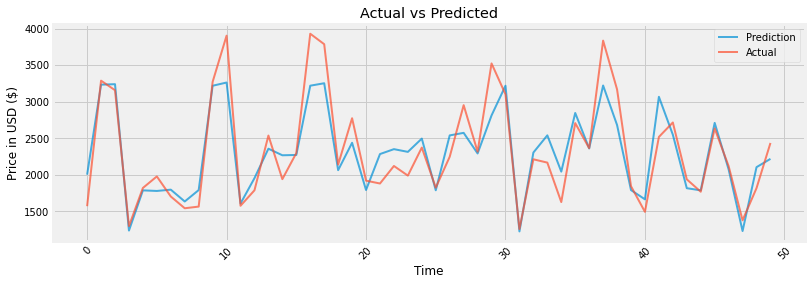

In [15]:
# Lets plot a graph showing Actual vs Predicted

plt.figure(figsize = (12,4))
plt.plot(svr_predicted, label = "Prediction", lw = 2, alpha = 0.7)
plt.plot(y_test, label = "Actual", lw = 2, alpha = 0.7)

plt.title("Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Price in USD ($)")
plt.legend()
plt.xticks(rotation = 45)
plt.show();